$$
    l(\theta)=k*\ln(\theta) + (n-k)*\ln(1-\theta)
$$

MLE de binomial

$$
   \theta^* = \frac{1}{n}\sum_{i=1}^n x_i
$$

Esperanza

$$
 \mathbf{E}[X] = \frac{1}{n}\sum_{i=1}^n x_i
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# k es la suma de los éxitos
# n el total de ensayos
# de esta manera, tratamos a la binomial como n ensayos de bernoulli

def ll_binom(theta, n, k):
    ll = k * np.log(theta) + (n - k) * np.log(1 - theta)
    return -ll

# inicializar parámetros
n = 10
k = 9

# definir teta inicial

theta_init = 0.2

# obtener el MLE numérico minimizando la función ll_binom

res = minimize(ll_binom, theta_init, args=(n, k), method="L-BFGS-B", bounds=[(0.00001, 0.99999)])
res.x

array([0.89999999])

In [4]:
k/n

0.9

**Ejemplo de un modelo de mezclas gaussianas**

Un modelo de mezcla gaussiana es un modelo probabilístico que supone que todos los puntos de datos se generan a partir de una mezcla de un número finito de pdfs gaussianas con parámetros desconocidos. El modelo se define matemáticamente de la siguiente manera:

$$ p(x; \mu_k, \Sigma_k, \pi_k) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k) $$

donde $x$ es un punto de datos, $\pi_k$ es el coeficiente de mezcla para la $k$-ésima componente gaussiana (en otras palabras, es la proporción del total de una mezcla que pertenece al $k$ componente), y debe sumar 1 (es decir, $\sum_{k=1}^n \pi_k = 1$); $\mu_k$ es la media de la $k$-ésima componente gaussiana, $\Sigma_k$ es la matriz de covarianza del $k$-ésimo componente gaussiano, y $\mathcal{N}(x|\mu_k, \Sigma_k)$ es la función de densidad de probabilidad de la distribución gaussiana multivariada con media $\mu_k$ y matriz de covarianza $\Sigma_k$. Si cada una de las $k$ componentes es univariada, el modelo se reduce a

$$ p(x;\mu_k, \sigma^2_k, \pi_k) = \pi_1 \mathcal{N}(x|\mu_1, \sigma_1^2) + \pi_2 \mathcal{N}(x|\mu_2, \sigma_2^2),\quad \text{con k=\{1, 2\}} $$

donde $x$ es un punto de datos, $\pi_1$ y $\pi_2$ son los coeficientes de mezcla de los dos componentes gaussianos, $\mu_1$ y $\mu_2$ son las medias de los dos componentes gaussianos y $\sigma_1 ^2$ y $\sigma_2^2$ son las varianzas de los dos componentes gaussianos.

Los parámetros $\mu_k, \sigma^2_k, \pi_k$ de un modelo de mezcla gaussiana se pueden estimar utilizando la estimación de máxima verosimilitud (MLE). La función de verosimilitud para un modelo de mezcla gaussiana está dada por:

$$ L(\theta) = \prod_{i=1}^{N} p(x_i|\theta) = \prod_{i=1}^{N} \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) $$

donde $\theta=(\mu_k, \sigma^2_k, \pi_k)$ representa los parámetros del modelo, $x_i$ es el $i$-ésimo punto de datos y $N$ es el número total de puntos de datos. El enfoque MLE implica encontrar los valores de $\theta$ que maximizan la función de probabilidad $L(\theta)$.

$$
 p(x; \mu_1, \mu_2, \sigma_1, \sigma_2, \pi) = \pi * N(\mu_1, \sigma_1) + (1-\pi) * N(\mu_2, \sigma_2)
$$



Problema de optimización

$$
\theta^* = \arg\max L(\theta);\quad \theta = \{\pi,\mu_k,\sigma_k \}
$$

sujeto a:

$$
\pi \in [0, 1],\mu_k \in (-\infty, \infty), \sigma_k > 0
$$

Proceso:

1. Simular datos con valores de parámetros conocidos.
2. Visualizar los datos simulados.
3. Definir la función de log-verosimilitud negativa para la mezcla de dos normales.
4. Definir valores iniciales para los parámetros a estimar.
5. Estimar los parámetros.
6. Visualizar las distribuciones que retornan los estimadores y comparar con los datos reales.

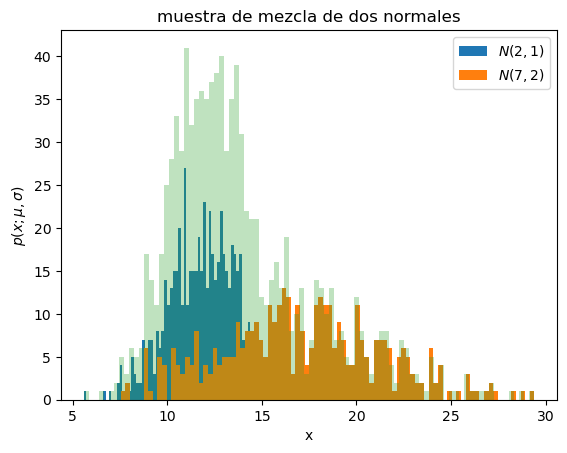

In [14]:
# Generar mezcla de dos distribuciones normales
# Paso 1
np.random.seed(13)
n = 1000
mu1 = 12
mu2 = 17
sigma1 = 2
sigma2 = 4

# corresponden a pi_1 y pi_2, o pi y 1-pi
weights = [0.6, 0.4]

# cada muestra es una mezcla con tamaño n * pi_k, por lo que n = n * pi_1 + n * pi_2
samples1 = norm.rvs(loc=mu1, scale=sigma1, size=int(n * weights[0]))

samples2 = norm.rvs(loc=mu2, scale=sigma2, size=int(n * weights[1]))
samples = np.concatenate([samples1, samples2])

# Paso 2
plt.hist(samples1, bins=90);
plt.hist(samples2, bins=90);
plt.hist(samples, bins=90, alpha=0.3)
plt.xlabel('x')
plt.ylabel('$p(x; \mu, \sigma)$')
plt.title('muestra de mezcla de dos normales')
plt.legend(['$N(2,1)$', '$N(7,2)$'])

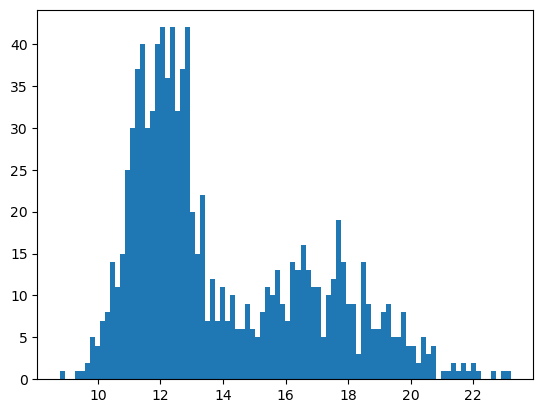

In [10]:
plt.hist(samples, bins=90);

In [18]:
norm.pdf([1, 2, 5, 10],5,2)

array([0.02699548, 0.0647588 , 0.19947114, 0.00876415])

Definir la pdf primero

$$
 p(x; \mu_1, \mu_2, \sigma_1, \sigma_2, \pi) = \pi * N(\mu_1, \sigma_1) + (1-\pi) * N(\mu_2, \sigma_2)
$$

In [22]:
# paso 3

def mixture_2norm(x, mu1, mu2, sig1, sig2, w):
    return w * norm.pdf(x, mu1, sig1) + (1 - w) * norm.pdf(x, mu2, sig2)

Definir la función de log-verosimilitud

$$
l(\mu_1,\mu_2,\sigma_1,\sigma_2,\pi) = \ln\prod_{i=1}^n\{\pi * N(x_i;\mu_1, \sigma_1) + (1-\pi) * N(x_i;\mu_2, \sigma_2)\}
$$

In [21]:
theta = [1, 2, 3]
a, b, c = theta
c

3

In [44]:
def neg_log_like_mix_norm(theta,x):
    # desempaquetar theta
    mu1, mu2, sig1, sig2, w = theta
    # log-verosimilitud; 
    log_like = np.log(mixture_2norm(x, mu1, mu2, sig1, sig2, w)+1e-90)
    sum_log_like = np.sum(log_like)
    return -sum_log_like

# Paso 3
# inicializar parámetros

theta_init = [8, 10, 1, 3, 0.1]

# minimizar la neg-log-like

res = minimize(neg_log_like_mix_norm, 
               theta_init,args=(samples),
               method="SLSQP", # sequential least squares quadratic programming
               bounds=[(None, None), (None, None), (0, None), (0, None), (0, 1)]
              )
# parámetros reales:
# n = 1000
# mu1 = 12
# mu2 = 17
# sigma1 = 2
# sigma2 = 4
# w = 0.6, 0.4

res.x


array([11.96318522, 17.77332184,  1.9143502 ,  3.99483097,  0.65538742])

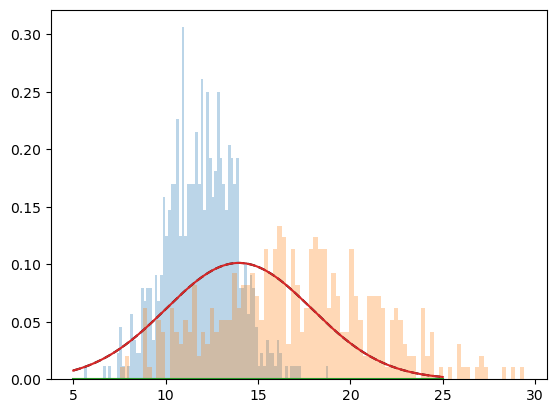

In [43]:
# paso 5

x = np.linspace(5, 25, 1000)
mu_1, mu_2, sig_1, sig_2, w = res.x
pdf_mezcla_estimada = mixture_2norm(x, mu_1, mu_2, sig_1, sig_2, w)
pdf1 = w*norm.pdf(x, mu_1, sig_1)
pdf2 = (1-w) * norm.pdf(x, mu_2,sig_2)
plt.hist(samples1, bins=90,alpha=0.3, density=True)
plt.hist(samples2, bins=90,alpha=0.3, density=True)
plt.plot(x, pdf_mezcla_estimada,'k--');
plt.plot(x,pdf1)
plt.plot(x,pdf2)